## Stroke Prediction Project

#### by Christopher Alfonso PID:6314071

### Install/Import Required Libraries 

In [1]:
#General libraries 
import pandas as pd
import numpy as np
import sklearn

#Plotting/graphs libraries 
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns

#Data preprocessing libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Model and model accuracy libraries 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

### Import CVS File

In [2]:
#library for file import
import os
working_directory = os.getcwd()
print(working_directory)

/Users/chris


In [3]:
#You might have to change around this code depending on your computer 
file_path = working_directory + '/Desktop/healthcare-dataset-stroke-data.csv'
data=pd.read_csv(file_path)

In [4]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Exploratory Data Analysis

In [5]:
data.shape

(5110, 12)

In [6]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
#Looking for empty data
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- As we can see there are some missing values in the BMI category. 
- This will be handled later with mean substitution.

In [9]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Removing Unnecessary Categories 

In [10]:
#Removed categories that I felt do not show a direct indicator of bodily health.
data = data.drop(['id', 'Residence_type', 'ever_married', 'work_type' ],axis=1)
data

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,202.21,NaN,never smoked,1
2,Male,80.0,0,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,166.29,25.6,formerly smoked,0


- Removed categories not having to do with direct indecators of bodily health.

### Preparing Data

#### Substituting missing values

In [11]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [12]:
data['bmi'].median()

28.1

In [13]:
data['bmi']=data['bmi'].fillna(data['bmi'].mean()) # or we can substitute with median

In [14]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

- We have filled the missing BMI values with the mean, there are no more missing values.

#### Outlier Search

<Axes: title={'center': 'Outlier Finding'}>

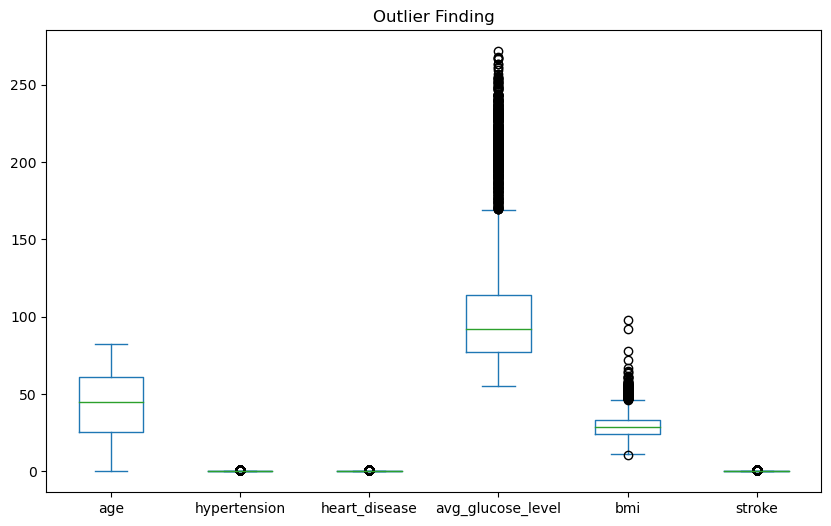

In [15]:
data.plot(kind='box', figsize=(10, 6), title='Outlier Finding')

- There are outliers in both glucose level and bmi.


In [16]:
outliers = ['bmi','avg_glucose_level']
#Using IQR to remove the outliers
Q1 = data[outliers].quantile(0.25)
Q3 = data[outliers].quantile(0.75)
IQR = Q3 - Q1
data_outliers = data[~((data[outliers]<(Q1-1.5*IQR))|(data[outliers]>(Q3+1.5*IQR))).any(axis=1)]
print('Shape of data with outliers:', data.shape)
print('Shape of data without outliers:', data_outliers.shape)

Shape of data with outliers: (5110, 8)
Shape of data without outliers: (4391, 8)


<Axes: >

<Figure size 1000x1000 with 0 Axes>

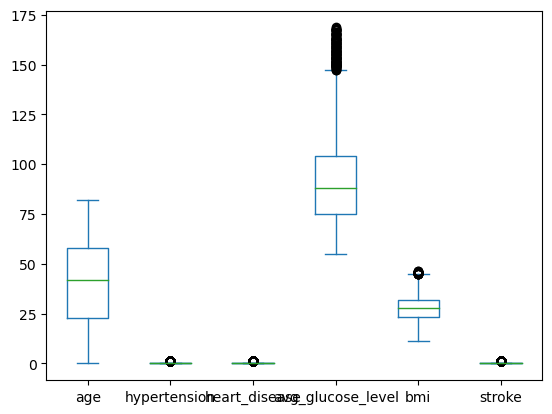

In [17]:
figure(figsize=(10, 10))
data_outliers.plot(kind='box')

In [18]:
#Using the data without outliers as the standard dataset 
data = data_outliers

### Modeling Target Feature 

<Axes: >

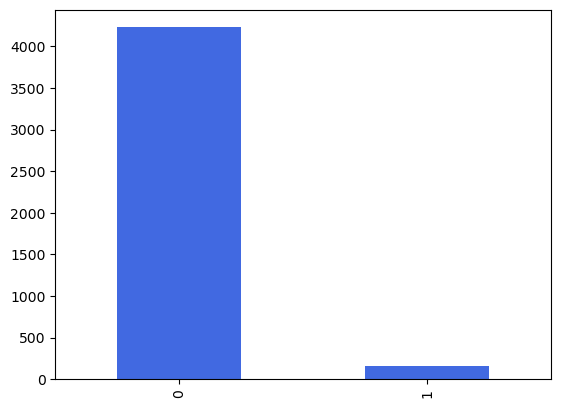

In [19]:
data['stroke'].value_counts().plot(kind="bar",color = "royalblue")

In [20]:
data['stroke'].value_counts()

0    4226
1     165
Name: stroke, dtype: int64

- As we can see there is a huge imbalance in the target class that will need to be fixed later on.
- This will be fixed later on using the SMOTE method.

In [21]:
#Hot encoding data to represent categorical data as numbers
data = pd.get_dummies(data)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,0,1,0
6,74.0,1,1,70.09,27.400000,1,0,1,0,0,0,1,0
7,69.0,0,0,94.39,22.800000,1,1,0,0,0,0,1,0
8,59.0,0,0,76.15,28.893237,1,1,0,0,1,0,0,0
9,78.0,0,0,58.57,24.200000,1,1,0,0,1,0,0,0


In [22]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000
mean,40.896406,0.074243,0.039171,91.477067,27.811399,0.037577,0.589843,0.409929,0.000228,0.322933,0.161239,0.363243,0.152585
std,22.544349,0.262195,0.194024,22.662442,6.562244,0.190192,0.491918,0.491876,0.015091,0.467651,0.367793,0.480989,0.359628
min,0.080000,0.000000,0.000000,55.120000,11.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,75.075000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,0.000000,0.000000,88.040000,27.600000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,0.000000,0.000000,104.020000,31.900000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,168.680000,46.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


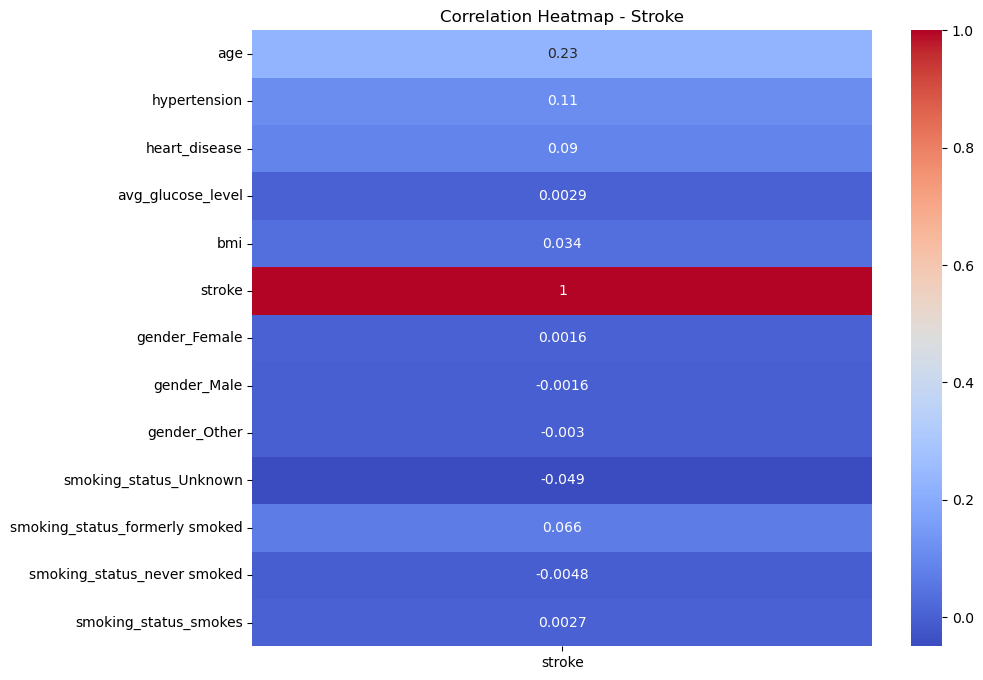

In [23]:
target = data.corr()[['stroke']]
plt.figure(figsize=(10, 8))
sns.heatmap(target, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Stroke')
plt.show()

### SMOTE

In [24]:
#Shape of the data before
data.shape

(4391, 13)

In [25]:
print(data['stroke'].value_counts())

0    4226
1     165
Name: stroke, dtype: int64


In [26]:
#We are using the SMOTE to solve the imbalance in our data to create new instances in the minority class.
X = data.drop(columns = ['stroke'])
y = data['stroke']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
data_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

In [27]:
print(data_resampled['stroke'].value_counts())

1    4226
0    4226
Name: stroke, dtype: int64


In [28]:
#Shape of the data after
print(data_resampled.shape)

(8452, 13)


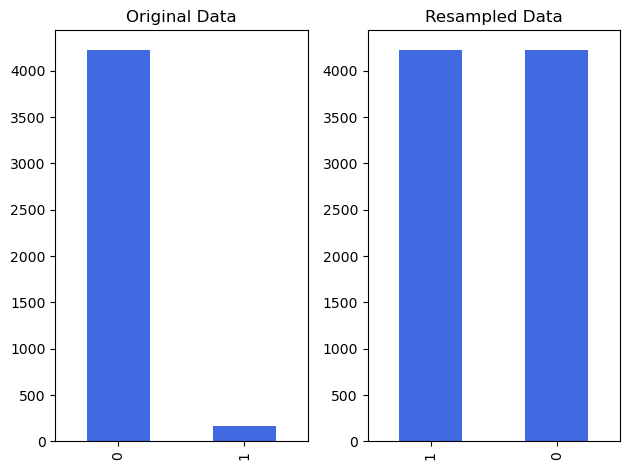

In [29]:
#Plotting the original data
plt.subplot(1, 2, 1)  
data['stroke'].value_counts().plot(kind="bar", color="royalblue")
plt.title('Original Data')

#Plotting the resampled data
plt.subplot(1, 2, 2)  
data_resampled['stroke'].value_counts().plot(kind="bar", color="royalblue")
plt.title('Resampled Data')

plt.tight_layout()


### Split train data and test data (75-25)

In [30]:
data_resampled = data_resampled.sample(frac=1).reset_index(drop=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size = .25,random_state = 300)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6339, 12), (6339,), (2113, 12), (2113,))

### Data Normilization 

In [32]:
#Normalizing my data using the standard deviation
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [33]:
print("Mean: ", np.mean(X_train_std))
print("Standard Deviation: ", np.std(X_train_std))

Mean:  -9.471661330135426e-17
Standard Deviation:  0.9999999999999999


In [34]:
print("Mean: ", np.mean(X_test_std))
print("Standard Deviation: ", np.std(X_test_std))

Mean:  -1.8319818327148032e-17
Standard Deviation:  0.957427107756338


- Mean is close to 0, and the standard devation is close to 1 meaning the data was standardized correctly

### Machine Learning Models

#### K-Nearest-Neighbors-Classifier (KNN)

In [35]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_std, y_train)

KNeighborsClassifier()

In [36]:
y_pred = KNN.predict(X_test_std)

In [37]:
print('\n KNN Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\n KNN Classification Report')
print(classification_report(y_test, y_pred))


 KNN Confusion Matrix
[[ 980   60]
 [  30 1043]]

 KNN Classification Report
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1040
           1       0.95      0.97      0.96      1073

    accuracy                           0.96      2113
   macro avg       0.96      0.96      0.96      2113
weighted avg       0.96      0.96      0.96      2113



In [38]:
KNN_accuracy = accuracy_score(y_test, y_pred)
print('Training-set Accuracy score:',accuracy_score(y_train,KNN.predict(X_train_std)))
print('Testing-set Accuracy score:', accuracy_score(y_test, y_pred))

Training-set Accuracy score: 0.967818267865594
Testing-set Accuracy score: 0.9574065309985802


#### Logistic Regression

In [39]:
LR = LogisticRegression()
LR.fit(X_train_std, y_train)

LogisticRegression()

In [40]:
y_pred = LR.predict(X_test_std)

In [41]:
print('\n Logistic Regression Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\n Logistic Regression Classification Report')
print(classification_report(y_test, y_pred))


 Logistic Regression Confusion Matrix
[[987  53]
 [135 938]]

 Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1040
           1       0.95      0.87      0.91      1073

    accuracy                           0.91      2113
   macro avg       0.91      0.91      0.91      2113
weighted avg       0.91      0.91      0.91      2113



In [42]:
LR_accuracy = accuracy_score(y_test, y_pred)
print('Training-set Accuracy score:',accuracy_score(y_train,LR.predict(X_train_std)))
print('Testing-set Accuracy score:', accuracy_score(y_test, y_pred))

Training-set Accuracy score: 0.9144975548193721
Testing-set Accuracy score: 0.9110269758637008


#### Support Vector Machine (SVM)

In [43]:
SVM = SVC(kernel='linear')
SVM.fit(X_train_std, y_train)


SVC(kernel='linear')

In [44]:
y_pred = SVM.predict(X_test_std)

In [45]:
print('\n SVM Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\n SVM Classification Report')
print(classification_report(y_test, y_pred))


 SVM Confusion Matrix
[[1040    0]
 [ 224  849]]

 SVM Classification Report
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1040
           1       1.00      0.79      0.88      1073

    accuracy                           0.89      2113
   macro avg       0.91      0.90      0.89      2113
weighted avg       0.91      0.89      0.89      2113



In [46]:
SVM_accuracy = accuracy_score(y_test, y_pred)
print('Training-set Accuracy score:',accuracy_score(y_train,SVM.predict(X_train_std)))
print('Testing-set Accuracy score:', accuracy_score(y_test, y_pred))

Training-set Accuracy score: 0.8955671241520745
Testing-set Accuracy score: 0.893989588263133


#### Stacked Model (combining all models)

In [47]:
stacked_model = StackingClassifier (estimators=[('knn', KNN),('lr', LR),('svm', SVM)],final_estimator=KNN)
stacked_model.fit(X_train_std, y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('lr', LogisticRegression()),
                               ('svm', SVC(kernel='linear'))],
                   final_estimator=KNeighborsClassifier())

In [48]:
y_pred = stacked_model.predict(X_test_std)

In [49]:
print('\n Stacked Model Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\n Stacked Model Classification Report')
print(classification_report(y_test, y_pred))


 Stacked Model Confusion Matrix
[[ 999   41]
 [  51 1022]]

 Stacked Model Classification Report
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1040
           1       0.96      0.95      0.96      1073

    accuracy                           0.96      2113
   macro avg       0.96      0.96      0.96      2113
weighted avg       0.96      0.96      0.96      2113



In [50]:
stacked_accuracy = accuracy_score(y_test, y_pred)
print('Training-set Accuracy score:',accuracy_score(y_train,stacked_model.predict(X_train_std)))
print('Testing-set Accuracy score:', stacked_accuracy )

Training-set Accuracy score: 0.9676605142766997
Testing-set Accuracy score: 0.9564600094652154


#### Comparing Results

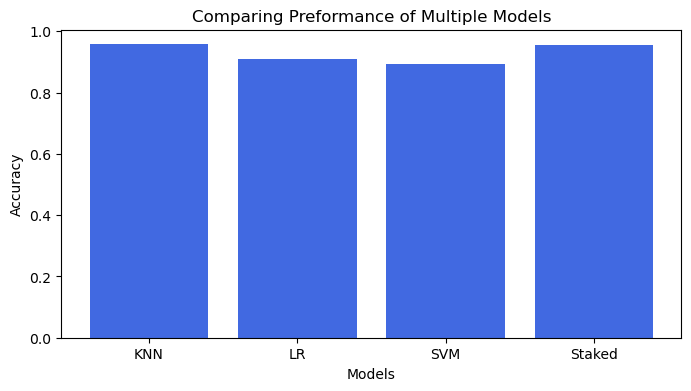

In [51]:

models = ['KNN', 'LR', 'SVM', 'Staked']
accuracy_scores = [KNN_accuracy, LR_accuracy, SVM_accuracy,stacked_accuracy]

plt.figure(figsize=(8, 4))
plt.bar(models, accuracy_scores, color='royalblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparing Preformance of Multiple Models')
plt.show()